<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/ANN_%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**앞서 살펴본 Basic part와 같은 전처리 과정과 기본 신경망 구성**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

np.random.seed(10)

URL = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(URL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
#중복행 제거
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
# Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# smoking history을 숫자형 데이터로 전환
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0, 'unknown': 999}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [7]:
df = df[df['age'].mod(1) == 0] # 'age' 열의 값이 정수인 행들만 선택
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [8]:
df['age'] = df['age'].astype(int) # age열의 데이터 타입을 int로 변환

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


In [10]:
X = df.iloc[:,:-1].values # 마지막 열을 제외한 모든 열을 선택
y = df.iloc[:,-1].values  # 마지막 열을 선택, 타켓 변수 = diabetes

In [11]:
from sklearn.model_selection import train_test_split # train set과 test set을 나누기 위해 import

# 데이터를 train set과 test set으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# train set에서 validation set을 따로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# standardization
from sklearn import preprocessing
stand = preprocessing.StandardScaler()

X_train = stand.fit_transform(X_train) # train set의 독립변수
X_test = stand.transform(X_test) # test set의 독립변수
X_val  = stand.transform(X_val)  # validation의 독립변수

In [13]:
X_train

array([[-0.84060846,  1.47575305, -0.29627002, ...,  0.26223806,
        -0.50124054,  0.03942913],
       [-0.84060846,  0.01311052, -0.29627002, ..., -0.0310244 ,
         0.62259817,  0.03942913],
       [ 1.18798925, -0.35255011, -0.29627002, ..., -0.0833927 ,
        -0.50124054,  0.4777377 ],
       ...,
       [-0.84060846,  0.24164842, -0.29627002, ...,  1.67917458,
         0.52894495, -1.29984706],
       [ 1.18798925,  0.74443179, -0.29627002, ...,  0.22183966,
         3.05758204,  3.93550531],
       [-0.84060846, -0.94674864, -0.29627002, ..., -0.98562366,
        -1.43777279,  1.5004577 ]])

In [14]:
X_test

array([[ 1.18798925,  0.60730905, -0.29627002, ...,  0.37894456,
         0.15433204, -0.93458992],
       [-0.84060846, -0.1697198 , -0.29627002, ..., -0.97814248,
        -0.50124054,  1.5004577 ],
       [-0.84060846,  1.1558    , -0.29627002, ..., -0.0310244 ,
        -0.68854699,  0.03942913],
       ...,
       [ 1.18798925, -0.99245622, -0.29627002, ..., -0.41106862,
        -0.50124054,  0.50208817],
       [-0.84060846, -0.8096259 , -0.29627002, ...,  1.17793516,
         0.43529172, -0.93458992],
       [ 1.18798925, -1.26670169, -0.29627002, ..., -0.91978923,
         0.24798527, -0.20407563]])

In [15]:
X_val

array([[-0.84060846, -0.71821074, -0.29627002, ..., -0.0310244 ,
         0.24798527,  0.50208817],
       [ 1.18798925, -1.58665475, -0.29627002, ..., -1.80705782,
        -0.50124054,  0.50208817],
       [-0.84060846,  1.65858337, -0.29627002, ..., -1.06941294,
        -0.96950667, -0.30147754],
       ...,
       [-0.84060846,  0.01311052, -0.29627002, ...,  1.11210073,
         0.43529172, -0.93458992],
       [-0.84060846,  0.24164842, -0.29627002, ..., -0.31530945,
        -0.96950667, -1.29984706],
       [-0.84060846,  0.0588181 ,  3.37529938, ..., -0.0310244 ,
         0.99721108, -1.17809468]])

In [17]:
# 신경망 모델 구성
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [18]:
# 컴파일 및 훈련
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.2209 - accuracy: 0.9315 - val_loss: 0.1258 - val_accuracy: 0.9559
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9566 - val_loss: 0.1200 - val_accuracy: 0.9571
Epoch 3/30
1507/1507 [==============================] - 2s 2ms/step - loss: 0.1222 - accuracy: 0.9569 - val_loss: 0.1189 - val_accuracy: 0.9572
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9580 - val_loss: 0.1207 - val_accuracy: 0.9553
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1213 - accuracy: 0.9580 - val_loss: 0.1185 - val_accuracy: 0.9576
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9577 - val_loss: 0.1188 - val_accuracy: 0.9575
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9577 - val_loss: 0.1182 - val_accuracy:

In [19]:
# 기본 신경망 정확도
ann.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1147 - accuracy: 0.9590


[0.11470173299312592, 0.9589950442314148]

**He initialization**

In [24]:
# He initialization
# 뉴런의 개수나 Epoch, 함수 종류는 기존의 신경망과 똑같이 맞췄다.
# kernel_initializer = he_normal
H_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='he_normal')
])

In [25]:
# 컴파일 및 훈련
H_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
H_model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8666 - val_loss: 0.1319 - val_accuracy: 0.9543
Epoch 2/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1274 - accuracy: 0.9564 - val_loss: 0.1210 - val_accuracy: 0.9568
Epoch 3/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1224 - accuracy: 0.9574 - val_loss: 0.1194 - val_accuracy: 0.9576
Epoch 4/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1213 - accuracy: 0.9578 - val_loss: 0.1185 - val_accuracy: 0.9572
Epoch 5/30
1507/1507 [==============================] - 6s 4ms/step - loss: 0.1202 - accuracy: 0.9579 - val_loss: 0.1171 - val_accuracy: 0.9583
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1179 - accuracy: 0.9596 - val_loss: 0.1142 - val_accuracy: 0.9602
Epoch 7/30
1507/1507 [==============================] - 5s 4ms/step - loss: 0.1150 - accuracy: 0.9609 - val_loss: 0.1114 - val_accuracy:

In [26]:
# H_model의 정확도
H_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1007 - accuracy: 0.9641


[0.10068409144878387, 0.9641472101211548]

**Xavier initialization**

In [27]:
# Xavier initialization
# X_model 구성
# kernel_initializer = glorot_uniform
X_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

In [28]:
# 컴파일 및 훈련
X_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8736 - val_loss: 0.1337 - val_accuracy: 0.9474
Epoch 2/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1269 - accuracy: 0.9543 - val_loss: 0.1196 - val_accuracy: 0.9563
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9575 - val_loss: 0.1164 - val_accuracy: 0.9581
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1188 - accuracy: 0.9581 - val_loss: 0.1149 - val_accuracy: 0.9591
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1172 - accuracy: 0.9582 - val_loss: 0.1133 - val_accuracy: 0.9586
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1158 - accuracy: 0.9583 - val_loss: 0.1128 - val_accuracy: 0.9583
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9583 - val_loss: 0.1118 - val_accuracy:

In [29]:
# X_model의 정확도
X_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9677


[0.09015793353319168, 0.9677059650421143]

**Batch normalization**

In [30]:
# Batch normalization
# B_moden 구성
# tf.keras.layers.BatchNormalization()
B_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [31]:
# 컴파일 및 훈련
B_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
B_model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
1507/1507 [==============================] - 6s 3ms/step - loss: 0.2471 - accuracy: 0.9081
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9508
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1319 - accuracy: 0.9533
Epoch 4/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1307 - accuracy: 0.9537
Epoch 5/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9547
Epoch 6/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9555
Epoch 7/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1244 - accuracy: 0.9553
Epoch 8/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9561
Epoch 9/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1194 - accuracy: 0.9583
Epoch 10/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.117

In [32]:
# B_model의 정확도
B_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.0924 - accuracy: 0.9689


[0.0923667624592781, 0.9689276218414307]

**L1 regularity**

In [33]:
# L1 regularity
# L1_model 구성
# kernel_regularizer=tf.keras.regularizers.l1(0.01)
# L2 regularity를 사용할 때는 regularizers.l2로 바꾸면 된다.
L1_model = tf.keras.models.Sequential()
L1_model.add(tf.keras.layers.Dense(units = 6, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation = 'relu'))
L1_model.add(tf.keras.layers.Dense(units = 6, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation = 'relu'))
L1_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [34]:
# 컴파일 및 훈련
L1_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = L1_model.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.9054 - val_loss: 0.2003 - val_accuracy: 0.9575
Epoch 2/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1769 - accuracy: 0.9578 - val_loss: 0.1602 - val_accuracy: 0.9578
Epoch 3/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1593 - accuracy: 0.9580 - val_loss: 0.1554 - val_accuracy: 0.9576
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1561 - accuracy: 0.9579 - val_loss: 0.1526 - val_accuracy: 0.9581
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1542 - accuracy: 0.9579 - val_loss: 0.1510 - val_accuracy: 0.9577
Epoch 6/30
1507/1507 [==============================] - 7s 5ms/step - loss: 0.1527 - accuracy: 0.9580 - val_loss: 0.1494 - val_accuracy: 0.9578
Epoch 7/30
1507/1507 [==============================] - 6s 4ms/step - loss: 0.1516 - accuracy: 0.9581 - val_loss: 0.1484 - val_accuracy:

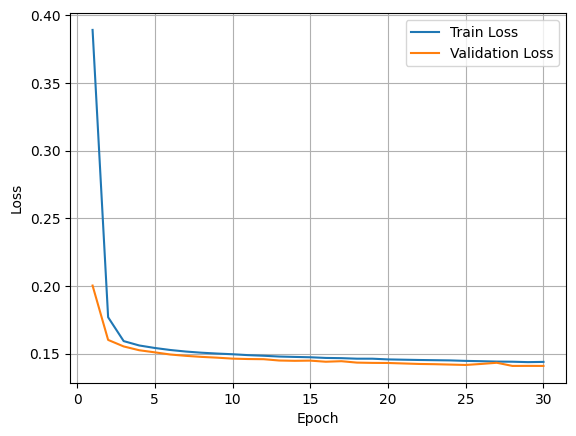

In [35]:
# 훈련 세트와 검증 세트의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch에 따른 손실 값 그래프
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# L1_model의 정확도
L1_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1405 - accuracy: 0.9585


[0.140473410487175, 0.9585170149803162]

**Drop out**

In [37]:
# Drop out
# D_model 구성
# initializer은 He initialization을 사용.
# tf.keras.layers.Dropout(rate = )
D_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='he_normal')
])

In [38]:
# 컴파일 및 훈련
D_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = D_model.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.8702 - val_loss: 0.1735 - val_accuracy: 0.9253
Epoch 2/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1818 - accuracy: 0.9312 - val_loss: 0.1358 - val_accuracy: 0.9543
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1573 - accuracy: 0.9434 - val_loss: 0.1289 - val_accuracy: 0.9564
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1459 - accuracy: 0.9485 - val_loss: 0.1211 - val_accuracy: 0.9580
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1388 - accuracy: 0.9517 - val_loss: 0.1184 - val_accuracy: 0.9582
Epoch 6/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1386 - accuracy: 0.9516 - val_loss: 0.1188 - val_accuracy: 0.9575
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1371 - accuracy: 0.9522 - val_loss: 0.1168 - val_accuracy:

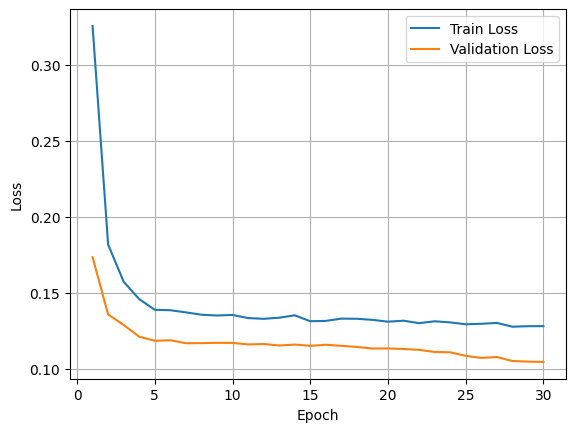

In [39]:
# 훈련 세트와 검증 세트의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch에 따른 손실 값 그래프
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
# D_model의 정확도
D_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1028 - accuracy: 0.9643


[0.10275564342737198, 0.9642534852027893]

**일부러 성능 저하시키기**

In [41]:
# 데이터에 잡음 추가
# noise_factor로 잡음의 정도를 조절
noise_factor = 0.5

noisy_X_train = X_train + noise_factor * np.random.randn(*X_train.shape)
noisy_X_val = X_val + noise_factor * np.random.randn(*X_val.shape)

# any_model 구성
any_model = tf.keras.models.Sequential()
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [42]:
# 모델 컴파일
any_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 잡음이 추가된 데이터로 모델 학습
history = any_model.fit(noisy_X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9015
Epoch 2/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 3/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 4/10
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 5/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 6/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 7/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 8/10
1507/1507 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 9/10
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108
Epoch 10/10
1507/1507 [==============================] - 

In [45]:
# any_model의 예측값
y_pred = any_model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

589/589 [==============================] - 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
# y_pred를 이진수 변환. False = 0 or True = 1
y_pred_binary = np.where(y_pred, 1, 0)
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [47]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[17077     0]
 [ 1750     0]]


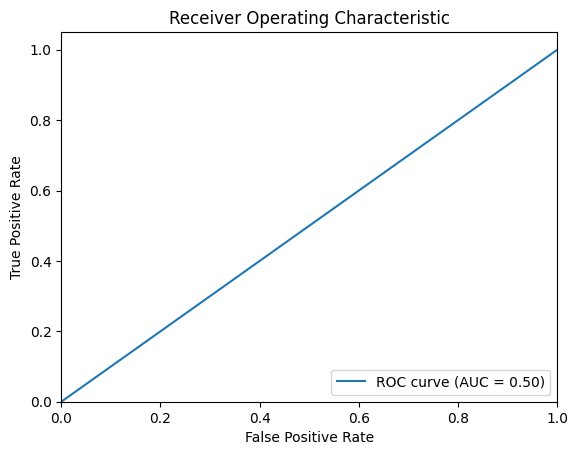

In [53]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# AUC
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# confusion matrix에서부터 2번째 column값이 0이 되어버려서 가치가 없어진 모델이 되었다.
# 때문에 AUC도 최저값인 0.5를 츨력하고 있다.

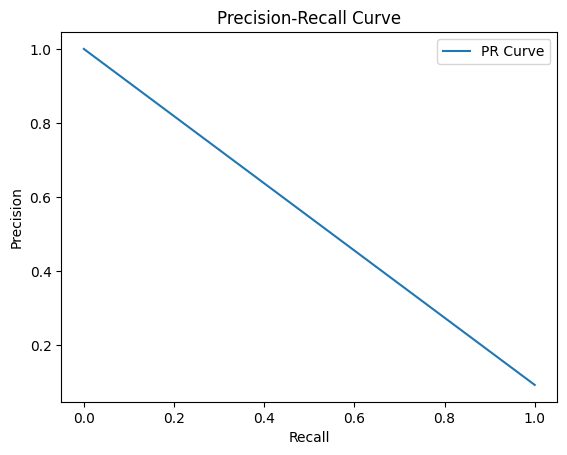

In [55]:
from sklearn.metrics import precision_recall_curve

# Precision, Recall, Threshold 값
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# PR curve
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()